# **Israel Elections Data Analysis**

An example notebook showing how to read and display the Israel 2021 elections results. This is the notebook for the first week.

In [1]:
# Add a check if we run in google colab or locally in jupyter notebook
run_in_colab = False
if 'google.colab' in str(get_ipython()):
    run_in_colab = True
    print('Running on CoLab')
else:
    print('Running locally on Jupyter')



Running locally on Jupyter


In [2]:
# First install tha needed packages using conda in the current Jupyter kernel
# Run once - should take a long time!
import sys
#if not(run_in_colab):
#  !conda install --yes --prefix {sys.prefix} numpy
#  !conda install --yes --prefix {sys.prefix} pandas
#  !conda install --yes --prefix {sys.prefix} matplotlib
#  !conda install --yes --prefix {sys.prefix} statsmodels  # statistical modelling 
#  !conda install --yes --prefix {sys.prefix} xlrd  # read excel 



# Alternatively, if your python wasn't installed using anaconda, we can use pip install: 
# !{sys.executable} -m pip install numpy
# !{sys.executable} -m pip install pandas
# !{sys.executable} -m pip install matplotlib


In [3]:
# Import modules 
import numpy as np  # a module for working with numerical array 
import pandas as pd  # a module for working with data-frames
import statsmodels.api as sm  # a module for statistical modelling (e.g. regression analysis)

First, we need to mount our local drive to the colab network

In [8]:
# Mount drive in google colab
if run_in_colab:
    from google.colab import drive
    drive.mount('/content/drive')
else:  # Set local path 
    data_path = "C:/Users/david/Desktop/third-year/A/lab-statistics/ex2/"  


In [9]:
# Loading elections 2021 elections data:
if run_in_colab:
    from google.colab import files
    uploaded = files.upload()

In [10]:
import io

data_type = "city" # "ballot"  # city
if   run_in_colab:
    df_2021_raw = pd.read_csv(io.BytesIO(uploaded['votes per city 2021.csv']),  encoding = 'iso-8859-8', index_col='שם ישוב')
else:  # read local file
    if data_type == "ballot":
        df_2021_raw = pd.read_csv(data_path + 'votes per ballot 2021.csv',  encoding = 'iso-8859-8', index_col='שם ישוב')
        # preprocessing of ballot
        df_2021 = df_2021_raw.drop('סמל ועדה', axis=1) # new column added in Sep 2019
        df_2021 = df_2021[df_2021.columns[8:-1]] # removing "metadata" columns
    else:
        df_2021_raw = pd.read_csv(data_path + 'votes per city 2021.csv',  encoding = 'iso-8859-8', index_col='שם ישוב')
        # preprocessing of cities 
        df_2021 = df_2021_raw.drop('סמל ועדה', axis=1) # new column added in Sep 2019
        df_2021 = df_2021[df_2021.columns[5:-1]] # removing "metadata" columns
# Dataset is now stored in a Pandas Dataframe
print(df_2021_raw.columns)
df_2021_raw.head()

Index(['סמל ועדה', 'סמל ישוב', 'בזב', 'מצביעים', 'פסולים', 'כשרים', 'אמת', 'ב',
       'ג', 'ודעם', 'ז', 'זץ', 'ט', 'י', 'יז', 'ינ', 'יף', 'יק', 'יר', 'כ',
       'כך', 'כן', 'ל', 'מחל', 'מרצ', 'נ', 'ני', 'נר', 'עם', 'פה', 'ףז', 'צי',
       'צכ', 'צף', 'ץ', 'ק', 'קי', 'קך', 'קץ', 'ר', 'רנ', 'רף', 'רק', 'שס',
       'ת', 'Unnamed: 46'],
      dtype='object')


,סמל ועדה,סמל ישוב,בזב,מצביעים,פסולים,כשרים,אמת,ב,ג,ודעם,...,קי,קך,קץ,ר,רנ,רף,רק,שס,ת,Unnamed: 46
שם ישוב,,,,,,,,,,,,,,,,,,,,,
אבירים,6,1220,221,151,1,150,47,0,0,3,...,0,0,0,5,0,0,0,1,8,NaN
אדירים,5,113,234,180,0,180,1,7,4,0,...,0,0,0,2,0,0,0,61,6,NaN
אושה,8,278,382,276,0,276,72,7,0,3,...,0,0,0,1,0,0,0,0,15,NaN
אחווה,17,1157,183,145,0,145,14,4,0,0,...,0,0,0,0,0,0,0,2,8,NaN
איבים,17,338,138,40,0,40,0,4,0,0,...,0,1,0,0,0,0,0,1,0,NaN


In [11]:
df_2021 = df_2021_raw.drop('סמל ועדה', axis=1) # new column added in Sep 2019
df_2021 = df_2021[df_2021.columns[5:-1]] # removing "metadata" columns
print("{} votes in March 2021".format(df_2021_raw['כשרים']['מעטפות חיצוניות']) + ' מעטפות חיצוניות ')



421619 votes in March 2021 מעטפות חיצוניות 


In [12]:
print(df_2021_raw.columns)
df_2021.head()


Index(['סמל ועדה', 'סמל ישוב', 'בזב', 'מצביעים', 'פסולים', 'כשרים', 'אמת', 'ב',
       'ג', 'ודעם', 'ז', 'זץ', 'ט', 'י', 'יז', 'ינ', 'יף', 'יק', 'יר', 'כ',
       'כך', 'כן', 'ל', 'מחל', 'מרצ', 'נ', 'ני', 'נר', 'עם', 'פה', 'ףז', 'צי',
       'צכ', 'צף', 'ץ', 'ק', 'קי', 'קך', 'קץ', 'ר', 'רנ', 'רף', 'רק', 'שס',
       'ת', 'Unnamed: 46'],
      dtype='object')


,אמת,ב,ג,ודעם,ז,זץ,ט,י,יז,ינ,...,ק,קי,קך,קץ,ר,רנ,רף,רק,שס,ת
שם ישוב,,,,,,,,,,,,,,,,,,,,,
אבירים,47,0,0,3,0,0,2,0,3,0,...,0,0,0,0,5,0,0,0,1,8
אדירים,1,7,4,0,0,0,9,0,1,0,...,0,0,0,0,2,0,0,0,61,6
אושה,72,7,0,3,0,0,0,0,2,0,...,0,0,0,0,1,0,0,0,0,15
אחווה,14,4,0,0,0,0,4,0,0,0,...,0,0,0,0,0,0,0,0,2,8
איבים,0,4,0,0,0,1,10,0,0,0,...,0,0,1,0,0,0,0,0,1,0


In [13]:
df_2021.describe()


,אמת,ב,ג,ודעם,ז,זץ,ט,י,יז,ינ,...,ק,קי,קך,קץ,ר,רנ,רף,רק,שס,ת
count,1215.000000,1215.000000,1215.000000,1215.000000,1215.000000,1215.000000,1215.000000,1215.000000,1215.000000,1215.000000,...,1215.000000,1215.000000,1215.000000,1215.000000,1215.000000,1215.000000,1215.000000,1215.0,1215.000000,1215.000000
mean,221.207407,225.379424,204.437037,174.965432,0.325103,0.545679,185.712757,0.667490,28.710288,0.335802,...,0.381070,0.325103,0.423045,0.600000,14.276543,0.978601,0.487243,0.0,260.088889,172.148971
std,1630.890978,1448.009636,2434.859254,924.732474,2.898415,3.250803,1149.958744,4.141412,169.416802,1.836611,...,3.373333,2.498201,2.369937,3.680126,72.194177,5.682239,3.259450,0.0,1759.336035,983.868998
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000
25%,7.000000,7.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,1.000000,7.000000
50%,36.000000,19.000000,1.000000,0.000000,0.000000,0.000000,6.000000,0.000000,3.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.0,3.000000,16.000000
75%,92.000000,49.000000,3.000000,3.000000,0.000000,0.000000,42.000000,0.000000,7.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,4.000000,0.000000,0.000000,0.0,24.000000,31.500000
max,38780.000000,39693.000000,58585.000000,14632.000000,88.000000,93.000000,27130.000000,82.000000,3876.000000,41.000000,...,106.000000,77.000000,59.000000,101.000000,1303.000000,144.000000,77.000000,0.0,39151.000000,22077.000000


In [14]:
# df_2021.reset_index(inplace=True)
df_2021.style.set_properties(**{'text-align': 'left'})
df_2021.head()
df_2021[1:4]




,אמת,ב,ג,ודעם,ז,זץ,ט,י,יז,ינ,...,ק,קי,קך,קץ,ר,רנ,רף,רק,שס,ת
שם ישוב,,,,,,,,,,,,,,,,,,,,,
אדירים,1,7,4,0,0,0,9,0,1,0,...,0,0,0,0,2,0,0,0,61,6
אושה,72,7,0,3,0,0,0,0,2,0,...,0,0,0,0,1,0,0,0,0,15
אחווה,14,4,0,0,0,0,4,0,0,0,...,0,0,0,0,0,0,0,0,2,8


In [15]:
df_2021.iloc[5]

אמת      0
ב        0
ג        0
ודעם    48
ז        0
זץ       0
ט        0
י        0
יז       0
ינ       0
יף       0
יק       0
יר       0
כ        0
כך       0
כן       0
ל        0
מחל      4
מרצ      0
נ        0
ני       0
נר       0
עם      32
פה       0
ףז       0
צי       0
צכ       0
צף       0
ץ        0
ק        0
קי       0
קך       0
קץ       0
ר        0
רנ       0
רף       0
רק       0
שס       0
ת        0
Name: אלעריאן, dtype: int64

In [16]:
df_2021.loc['הרצליה']

אמת      5127
ב        2680
ג         449
ודעם       92
ז           5
זץ          3
ט         959
י           8
יז        511
ינ          1
יף          1
יק          1
יר          2
כ           2
כך         11
כן       6908
ל        2413
מחל     11580
מרצ      4557
נ           2
ני          3
נר          0
עם          9
פה      14701
ףז         12
צי          7
צכ          2
צף          1
ץ           1
ק           4
קי          1
קך          5
קץ          7
ר         215
רנ         17
רף          1
רק          0
שס       1677
ת        2996
Name: הרצליה, dtype: int64

Now let's do some plotting

<AxesSubplot:>

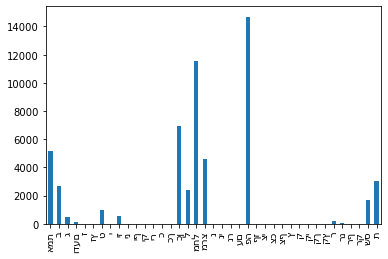

In [17]:
from matplotlib import pyplot as plt
df_2021.loc['הרצליה'].plot.bar()

<AxesSubplot:>

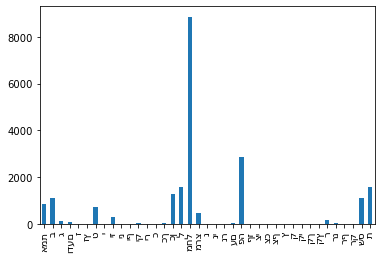

In [18]:
df_2021.loc['אילת'].plot.bar()

Next, we create a function for showing a bar plot of the voting **percentage** in a given city, while showing only the parties above a % threshold 

<AxesSubplot:>

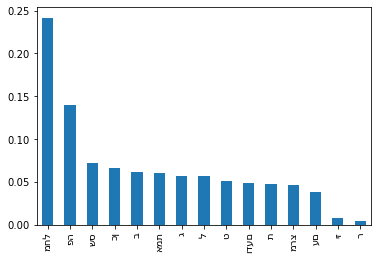

In [19]:
# Compute votes share only for parties above a certain threshold 
def parties_votes_percents(df, thresh):
    par = df.sum().div(df.sum().sum()).sort_values(ascending=False)
    return par[par > thresh]

total_votes = parties_votes_percents(df_2021, 0.001)  # total votes for each party
total_votes.plot.bar()



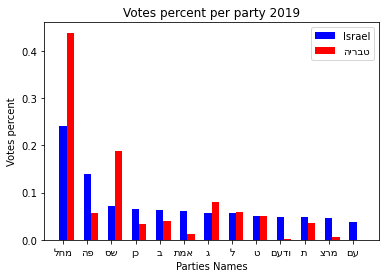

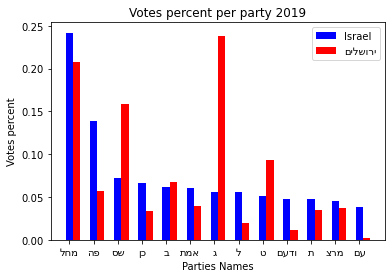

(<Figure size 432x288 with 1 Axes>,
 <AxesSubplot:title={'center':'Votes percent per party 2019'}, xlabel='Parties Names', ylabel='Votes percent'>)

In [20]:
# Bar plot for a party, only showing values above a certain threshold
def party_bar(df, thresh, city):
    width = 0.3  # set column width 
    votes = parties_votes_percents(df, thresh)  # total votes for each party
    n = len(votes)  # number of parties
    names = votes.keys()

    rev_names = [name[::-1] for name in list(names)]
    fig, ax = plt.subplots()  # plt.subplots()

    city_votes = df.loc[city,names] / df.loc[city,names].sum()
    all_bar = ax.bar(np.arange(n), list(votes), width, color='b')
    city_bar = ax.bar(np.arange(n)+width, list(city_votes), width, color='r')

    ax.set_ylabel('Votes percent')
    ax.set_xlabel('Parties Names')
    ax.set_title('Votes percent per party 2019')
    ax.set_xticks(np.arange(n))
    ax.set_xticklabels(rev_names)
    ax.legend((all_bar[0], city_bar[0]), ('Israel', city[::-1]))
    plt.show()

    return fig, ax


party_bar(df_2021, 0.0325, 'טבריה')
party_bar(df_2021, 0.0325, 'ירושלים')

Show histogram of number of votes for a column
 


<AxesSubplot:>

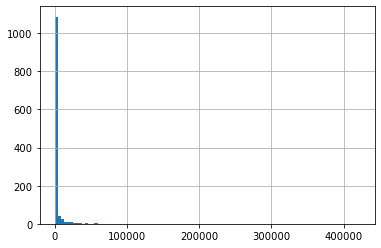

In [21]:
df_2021_raw['כשרים'].hist(bins=100)

Find for a party the city with the strongest support

In [22]:
def find_top_city(df, party):

  votes_percent_per_city = df.div(df.sum(axis=1), axis=0)
  print(votes_percent_per_city[party].max())
  print(votes_percent_per_city[party].idxmax())

find_top_city(df_2021, 'מחל')
find_top_city(df_2021, 'פה')
find_top_city(df_2021, 'ג')
find_top_city(df_2021, 'ודעם')

0.7910447761194029
גדיש
0.4117647058823529
גבעת שפירא
0.9419354838709677
קוממיות
0.8047945205479452
אום אלפחם


Next, we want to compare two parties

In [23]:
# Show party votes for two parties
def two_parties_scatter(df, party1, party2):
    votes_per_city = df.sum(axis=1)
    party_share1 = df[party1] / votes_per_city
    party_share2 = df[party2] / votes_per_city

    plt.scatter(party_share1, party_share2, s = (df["בזב"]/180000 )* 200 , alpha=0.5)  # Here draw circles with area proportional to city size
    plt.xlabel(party1[::-1])
    plt.ylabel(party2[::-1])
    plt.title('Scatter for two parties ' )
    plt.show()


In [24]:
two_parties_scatter(df_2021, "אמת", "שס")

KeyError: 'בזב'

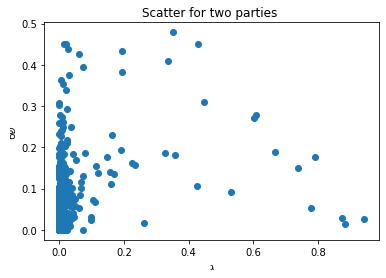

In [23]:
two_parties_scatter(df_2021, "ג", "שס")

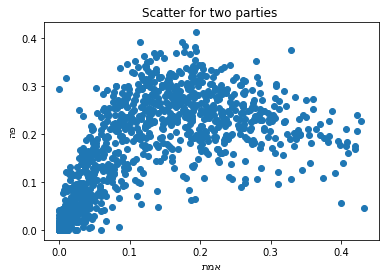

In [24]:
two_parties_scatter(df_2021, "אמת", "פה")

In [25]:
# Check sum of eligible votes 
df_2021.sum(axis=1) - df_2021_raw['כשרים'] 

שם ישוב
אבירים             0
אדירים             0
אושה               0
אחווה              0
איבים              0
                  ..
קורנית             0
שורשים             0
שכניה              0
שער אפרים          0
מעטפות חיצוניות    0
Length: 1215, dtype: int64

Compute pairwise correlations between parties:

In [26]:
df_2021.shape

(1215, 39)

Show heatmap of the correlation matrix: 


In [25]:
# Display heatmap for a correlation matrix 
# Input: 
# corr_mat - matrix of correlations 
# names - vector with names for each row/column
def heatmap_corr(corr_mat, names):
    rev_names = [name[::-1] for name in list(names)]
    fig, ax = plt.subplots()
    im = ax.imshow(corr_mat, cmap=plt.get_cmap('viridis'))
    n = corr_mat.shape[0]  # get number of variables 
    ax.set_xticks(np.arange(n))
    ax.set_yticks(np.arange(n))
    ax.set_xticklabels(rev_names)
    ax.set_yticklabels(rev_names)
    ax.set_title("Parties pairwise correlations")
    
    # Create colorbar
    cbar = ax.figure.colorbar(im, ax=ax) #  **cbar_kw)
    cbar.ax.set_ylabel('votes correlation', rotation=-90, va="bottom")

    
df_2021['Citable docs per Capita'].corr(Top15['Energy Supply per Capita'])

Create a dictionary mapping parties names to voting letters

In [32]:
parties_dict_2021 ={'אמת' : "עבודה", 'מרצ' : "מרצ",  'ג' : "יהדות התורה", 'עם'  : "רעם",  'ת'  : "תקוה חדשה", 'ודעם'  : "הרשימה המשותפת", 'ב'  : "ימינה", 'ט'  : "הציונות הדתית",
 'ל'  : "ישראל ביתנו", 'מחל'  : "הליכוד",  'פה'  : "יש עתיד", 'כן'  : "כחול לבן", 'שס'  : "שס"}
print(parties_dict_2021["ב"])
print(parties_dict_2021["ג"])
print(parties_dict_2021["ודעם"])


ימינה
יהדות התורה
הרשימה המשותפת


Read the election results by ballot (not city)

In [36]:
if   run_in_colab:
    df_2021_ballots_raw = pd.read_csv(io.BytesIO(uploaded['votes per ballot 2021.csv']),  encoding = 'iso-8859-8', index_col='שם ישוב')
else:
  df_2021_ballots_raw = pd.read_csv(data_path + 'votes per ballot 2021.csv',  encoding = 'iso-8859-8', index_col='שם ישוב')  # need to read locally
df_2021_ballots_raw.head()

,סמל ועדה,ברזל,סמל ישוב,קלפי,ריכוז,שופט,בזב,מצביעים,פסולים,כשרים,אמת,ב,ג,ודעם,ז,זץ,ט,י,יז,ינ,יף,יק,יר,כ,כך,כן,ל,מחל,מרצ,נ,ני,נר,עם,פה,ףז,צי,צכ,צף,ץ,ק,קי,קך,קץ,ר,רנ,רף,רק,שס,ת,Unnamed: 50
שם ישוב,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
אבירים,6,3238,1220,1.0,1,0,221,151,1,150,47,0,0,3,0,0,2,0,3,0,0,0,0,0,0,16,2,5,31,0,0,0,0,27,0,0,0,0,0,0,0,0,0,5,0,0,0,1,8,NaN
אדירים,5,1788,113,1.0,1,0,234,180,0,180,1,7,4,0,0,0,9,0,1,0,0,0,0,0,0,3,0,84,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,2,0,0,0,61,6,NaN
אושה,8,4113,278,1.0,1,0,382,276,0,276,72,7,0,3,0,0,0,0,2,0,0,1,0,0,0,37,8,24,20,0,0,0,0,86,0,0,0,0,0,0,0,0,0,1,0,0,0,0,15,NaN
אחווה,17,10449,1157,1.0,1,0,183,145,0,145,14,4,0,0,0,0,4,0,0,0,0,0,0,0,0,36,3,27,10,0,0,0,0,37,0,0,0,0,0,0,0,0,0,0,0,0,0,2,8,NaN
איבים,17,10450,338,1.0,1,0,138,40,0,40,0,4,0,0,0,1,10,0,0,0,0,0,0,0,0,5,0,17,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,NaN


In [37]:
df_2021_ballots = df_2021_ballots_raw.drop('סמל ועדה', axis=1) # new column added in Sep 2019
df_2021_ballots = df_2021_ballots[df_2021_ballots.columns[8:-1]] # removing "metadata" columns
df_2021_ballots.head()

,כשרים,אמת,ב,ג,ודעם,ז,זץ,ט,י,יז,ינ,יף,יק,יר,כ,כך,כן,ל,מחל,מרצ,נ,ני,נר,עם,פה,ףז,צי,צכ,צף,ץ,ק,קי,קך,קץ,ר,רנ,רף,רק,שס,ת
שם ישוב,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
אבירים,150,47,0,0,3,0,0,2,0,3,0,0,0,0,0,0,16,2,5,31,0,0,0,0,27,0,0,0,0,0,0,0,0,0,5,0,0,0,1,8
אדירים,180,1,7,4,0,0,0,9,0,1,0,0,0,0,0,0,3,0,84,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,2,0,0,0,61,6
אושה,276,72,7,0,3,0,0,0,0,2,0,0,1,0,0,0,37,8,24,20,0,0,0,0,86,0,0,0,0,0,0,0,0,0,1,0,0,0,0,15
אחווה,145,14,4,0,0,0,0,4,0,0,0,0,0,0,0,0,36,3,27,10,0,0,0,0,37,0,0,0,0,0,0,0,0,0,0,0,0,0,2,8
איבים,40,0,4,0,0,0,1,10,0,0,0,0,0,0,0,0,5,0,17,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0


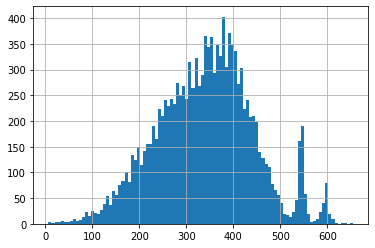

In [38]:
df_2021_ballots_raw['כשרים'].hist(bins=100)

In [39]:
df_2021_ballots_raw.shape

(12926, 50)

In [39]:
# Make corrections to the votes 
# Correct for voting turnout in cities/ballots (from lab2)
# df - matrix of voters for each party and each city
# v - vector of total bz"b for each city 
# Assume that for each city, the proportion for each party is the same fofr voters and non-voters
s_copy = df_2021_raw.copy()
for i, row in df_2021_raw.iterrows():
    for j, column in row.iteritems():
        
        t+=1
        Y = 0
        if(j == "שם יישוב"):
            continue
        elif(j == "סמל יישוב"):
            continue
        elif (j == "בזב"):
            bazab = column
        elif (j == "מצביעים"):
            votes = column
        elif (j == "פסולים"):
            Y += column
        elif (j == "כשרים"):
            kosher = column
            Y+= (bazab - kosher)
        else:
            p = column / 1
            column += p * Y
            
        

def simple_turnout_correction(df, v):
    p = df.sum().div(df.sum().sum())  # votes without correction
    # fill code here 
    # q_hat = ...
    return q_hat



סמל ועדה
סמל ישוב
בזב
מצביעים
פסולים
כשרים
אמת
ב
ג
ודעם
ז
זץ
ט
י
יז
ינ
יף
יק
יר
כ
כך
כן
ל
מחל
מרצ
נ
ני
נר
עם
פה
ףז
צי
צכ
צף
ץ
ק
קי
קך
קץ
ר
רנ
רף
רק
שס
ת
Unnamed: 46
סמל ועדה
סמל ישוב
בזב
מצביעים
פסולים
כשרים
אמת
ב
ג
ודעם
ז
זץ
ט
י
יז
ינ
יף
יק
יר
כ
כך
כן
ל
מחל
מרצ
נ
ני
נר
עם
פה
ףז
צי
צכ
צף
ץ
ק
קי
קך
קץ
ר
רנ
רף
רק
שס
ת
Unnamed: 46
סמל ועדה
סמל ישוב
בזב
מצביעים
פסולים
כשרים
אמת
ב
ג
ודעם
ז
זץ
ט
י
יז
ינ
יף
יק
יר
כ
כך
כן
ל
מחל
מרצ
נ
ני
נר
עם
פה
ףז
צי
צכ
צף
ץ
ק
קי
קך
קץ
ר
רנ
רף
רק
שס
ת
Unnamed: 46
סמל ועדה
סמל ישוב
בזב
מצביעים
פסולים
כשרים
אמת
ב
ג
ודעם
ז
זץ
ט
י
יז
ינ
יף
יק
יר
כ
כך
כן
ל
מחל
מרצ
נ
ני
נר
עם
פה
ףז
צי
צכ
צף
ץ
ק
קי
קך
קץ
ר
רנ
רף
רק
שס
ת
Unnamed: 46
סמל ועדה
סמל ישוב
בזב
מצביעים
פסולים
כשרים
אמת
ב
ג
ודעם
ז
זץ
ט
י
יז
ינ
יף
יק
יר
כ
כך
כן
ל
מחל
מרצ
נ
ני
נר
עם
פה
ףז
צי
צכ
צף
ץ
ק
קי
קך
קץ
ר
רנ
רף
רק
שס
ת
Unnamed: 46
סמל ועדה
סמל ישוב
בזב
מצביעים
פסולים
כשרים
אמת
ב
ג
ודעם
ז
זץ
ט
י
יז
ינ
יף
יק
יר
כ
כך
כן
ל
מחל
מרצ
נ
ני
נר
עם
פה
ףז
צי
צכ
צף
ץ
ק
קי
קך
קץ
ר
רנ
רף
רק
שס
ת
Unnamed: 46
סמל ועדה
ס

ל
מחל
מרצ
נ
ני
נר
עם
פה
ףז
צי
צכ
צף
ץ
ק
קי
קך
קץ
ר
רנ
רף
רק
שס
ת
Unnamed: 46
סמל ועדה
סמל ישוב
בזב
מצביעים
פסולים
כשרים
אמת
ב
ג
ודעם
ז
זץ
ט
י
יז
ינ
יף
יק
יר
כ
כך
כן
ל
מחל
מרצ
נ
ני
נר
עם
פה
ףז
צי
צכ
צף
ץ
ק
קי
קך
קץ
ר
רנ
רף
רק
שס
ת
Unnamed: 46
סמל ועדה
סמל ישוב
בזב
מצביעים
פסולים
כשרים
אמת
ב
ג
ודעם
ז
זץ
ט
י
יז
ינ
יף
יק
יר
כ
כך
כן
ל
מחל
מרצ
נ
ני
נר
עם
פה
ףז
צי
צכ
צף
ץ
ק
קי
קך
קץ
ר
רנ
רף
רק
שס
ת
Unnamed: 46
סמל ועדה
סמל ישוב
בזב
מצביעים
פסולים
כשרים
אמת
ב
ג
ודעם
ז
זץ
ט
י
יז
ינ
יף
יק
יר
כ
כך
כן
ל
מחל
מרצ
נ
ני
נר
עם
פה
ףז
צי
צכ
צף
ץ
ק
קי
קך
קץ
ר
רנ
רף
רק
שס
ת
Unnamed: 46
סמל ועדה
סמל ישוב
בזב
מצביעים
פסולים
כשרים
אמת
ב
ג
ודעם
ז
זץ
ט
י
יז
ינ
יף
יק
יר
כ
כך
כן
ל
מחל
מרצ
נ
ני
נר
עם
פה
ףז
צי
צכ
צף
ץ
ק
קי
קך
קץ
ר
רנ
רף
רק
שס
ת
Unnamed: 46
סמל ועדה
סמל ישוב
בזב
מצביעים
פסולים
כשרים
אמת
ב
ג
ודעם
ז
זץ
ט
י
יז
ינ
יף
יק
יר
כ
כך
כן
ל
מחל
מרצ
נ
ני
נר
עם
פה
ףז
צי
צכ
צף
ץ
ק
קי
קך
קץ
ר
רנ
רף
רק
שס
ת
Unnamed: 46
סמל ועדה
סמל ישוב
בזב
מצביעים
פסולים
כשרים
אמת
ב
ג
ודעם
ז
זץ
ט
י
יז
ינ
יף
יק
יר
כ
כך
כן
ל
מחל
מרצ


ץ
ק
קי
קך
קץ
ר
רנ
רף
רק
שס
ת
Unnamed: 46
סמל ועדה
סמל ישוב
בזב
מצביעים
פסולים
כשרים
אמת
ב
ג
ודעם
ז
זץ
ט
י
יז
ינ
יף
יק
יר
כ
כך
כן
ל
מחל
מרצ
נ
ני
נר
עם
פה
ףז
צי
צכ
צף
ץ
ק
קי
קך
קץ
ר
רנ
רף
רק
שס
ת
Unnamed: 46
סמל ועדה
סמל ישוב
בזב
מצביעים
פסולים
כשרים
אמת
ב
ג
ודעם
ז
זץ
ט
י
יז
ינ
יף
יק
יר
כ
כך
כן
ל
מחל
מרצ
נ
ני
נר
עם
פה
ףז
צי
צכ
צף
ץ
ק
קי
קך
קץ
ר
רנ
רף
רק
שס
ת
Unnamed: 46
סמל ועדה
סמל ישוב
בזב
מצביעים
פסולים
כשרים
אמת
ב
ג
ודעם
ז
זץ
ט
י
יז
ינ
יף
יק
יר
כ
כך
כן
ל
מחל
מרצ
נ
ני
נר
עם
פה
ףז
צי
צכ
צף
ץ
ק
קי
קך
קץ
ר
רנ
רף
רק
שס
ת
Unnamed: 46
סמל ועדה
סמל ישוב
בזב
מצביעים
פסולים
כשרים
אמת
ב
ג
ודעם
ז
זץ
ט
י
יז
ינ
יף
יק
יר
כ
כך
כן
ל
מחל
מרצ
נ
ני
נר
עם
פה
ףז
צי
צכ
צף
ץ
ק
קי
קך
קץ
ר
רנ
רף
רק
שס
ת
Unnamed: 46
סמל ועדה
סמל ישוב
בזב
מצביעים
פסולים
כשרים
אמת
ב
ג
ודעם
ז
זץ
ט
י
יז
ינ
יף
יק
יר
כ
כך
כן
ל
מחל
מרצ
נ
ני
נר
עם
פה
ףז
צי
צכ
צף
ץ
ק
קי
קך
קץ
ר
רנ
רף
רק
שס
ת
Unnamed: 46
סמל ועדה
סמל ישוב
בזב
מצביעים
פסולים
כשרים
אמת
ב
ג
ודעם
ז
זץ
ט
י
יז
ינ
יף
יק
יר
כ
כך
כן
ל
מחל
מרצ
נ
ני
נר
עם
פה
ףז
צי
צכ
צף
ץ
ק
קי
קך


ני
נר
עם
פה
ףז
צי
צכ
צף
ץ
ק
קי
קך
קץ
ר
רנ
רף
רק
שס
ת
Unnamed: 46
סמל ועדה
סמל ישוב
בזב
מצביעים
פסולים
כשרים
אמת
ב
ג
ודעם
ז
זץ
ט
י
יז
ינ
יף
יק
יר
כ
כך
כן
ל
מחל
מרצ
נ
ני
נר
עם
פה
ףז
צי
צכ
צף
ץ
ק
קי
קך
קץ
ר
רנ
רף
רק
שס
ת
Unnamed: 46
סמל ועדה
סמל ישוב
בזב
מצביעים
פסולים
כשרים
אמת
ב
ג
ודעם
ז
זץ
ט
י
יז
ינ
יף
יק
יר
כ
כך
כן
ל
מחל
מרצ
נ
ני
נר
עם
פה
ףז
צי
צכ
צף
ץ
ק
קי
קך
קץ
ר
רנ
רף
רק
שס
ת
Unnamed: 46
סמל ועדה
סמל ישוב
בזב
מצביעים
פסולים
כשרים
אמת
ב
ג
ודעם
ז
זץ
ט
י
יז
ינ
יף
יק
יר
כ
כך
כן
ל
מחל
מרצ
נ
ני
נר
עם
פה
ףז
צי
צכ
צף
ץ
ק
קי
קך
קץ
ר
רנ
רף
רק
שס
ת
Unnamed: 46
סמל ועדה
סמל ישוב
בזב
מצביעים
פסולים
כשרים
אמת
ב
ג
ודעם
ז
זץ
ט
י
יז
ינ
יף
יק
יר
כ
כך
כן
ל
מחל
מרצ
נ
ני
נר
עם
פה
ףז
צי
צכ
צף
ץ
ק
קי
קך
קץ
ר
רנ
רף
רק
שס
ת
Unnamed: 46
סמל ועדה
סמל ישוב
בזב
מצביעים
פסולים
כשרים
אמת
ב
ג
ודעם
ז
זץ
ט
י
יז
ינ
יף
יק
יר
כ
כך
כן
ל
מחל
מרצ
נ
ני
נר
עם
פה
ףז
צי
צכ
צף
ץ
ק
קי
קך
קץ
ר
רנ
רף
רק
שס
ת
Unnamed: 46
סמל ועדה
סמל ישוב
בזב
מצביעים
פסולים
כשרים
אמת
ב
ג
ודעם
ז
זץ
ט
י
יז
ינ
יף
יק
יר
כ
כך
כן
ל
מחל
מרצ
נ
ני
נר
עם
פ

שס
ת
Unnamed: 46
סמל ועדה
סמל ישוב
בזב
מצביעים
פסולים
כשרים
אמת
ב
ג
ודעם
ז
זץ
ט
י
יז
ינ
יף
יק
יר
כ
כך
כן
ל
מחל
מרצ
נ
ני
נר
עם
פה
ףז
צי
צכ
צף
ץ
ק
קי
קך
קץ
ר
רנ
רף
רק
שס
ת
Unnamed: 46
סמל ועדה
סמל ישוב
בזב
מצביעים
פסולים
כשרים
אמת
ב
ג
ודעם
ז
זץ
ט
י
יז
ינ
יף
יק
יר
כ
כך
כן
ל
מחל
מרצ
נ
ני
נר
עם
פה
ףז
צי
צכ
צף
ץ
ק
קי
קך
קץ
ר
רנ
רף
רק
שס
ת
Unnamed: 46
סמל ועדה
סמל ישוב
בזב
מצביעים
פסולים
כשרים
אמת
ב
ג
ודעם
ז
זץ
ט
י
יז
ינ
יף
יק
יר
כ
כך
כן
ל
מחל
מרצ
נ
ני
נר
עם
פה
ףז
צי
צכ
צף
ץ
ק
קי
קך
קץ
ר
רנ
רף
רק
שס
ת
Unnamed: 46
סמל ועדה
סמל ישוב
בזב
מצביעים
פסולים
כשרים
אמת
ב
ג
ודעם
ז
זץ
ט
י
יז
ינ
יף
יק
יר
כ
כך
כן
ל
מחל
מרצ
נ
ני
נר
עם
פה
ףז
צי
צכ
צף
ץ
ק
קי
קך
קץ
ר
רנ
רף
רק
שס
ת
Unnamed: 46
סמל ועדה
סמל ישוב
בזב
מצביעים
פסולים
כשרים
אמת
ב
ג
ודעם
ז
זץ
ט
י
יז
ינ
יף
יק
יר
כ
כך
כן
ל
מחל
מרצ
נ
ני
נר
עם
פה
ףז
צי
צכ
צף
ץ
ק
קי
קך
קץ
ר
רנ
רף
רק
שס
ת
Unnamed: 46
סמל ועדה
סמל ישוב
בזב
מצביעים
פסולים
כשרים
אמת
ב
ג
ודעם
ז
זץ
ט
י
יז
ינ
יף
יק
יר
כ
כך
כן
ל
מחל
מרצ
נ
ני
נר
עם
פה
ףז
צי
צכ
צף
ץ
ק
קי
קך
קץ
ר
רנ
רף
רק
שס
ת
Unnam

כשרים
אמת
ב
ג
ודעם
ז
זץ
ט
י
יז
ינ
יף
יק
יר
כ
כך
כן
ל
מחל
מרצ
נ
ני
נר
עם
פה
ףז
צי
צכ
צף
ץ
ק
קי
קך
קץ
ר
רנ
רף
רק
שס
ת
Unnamed: 46
סמל ועדה
סמל ישוב
בזב
מצביעים
פסולים
כשרים
אמת
ב
ג
ודעם
ז
זץ
ט
י
יז
ינ
יף
יק
יר
כ
כך
כן
ל
מחל
מרצ
נ
ני
נר
עם
פה
ףז
צי
צכ
צף
ץ
ק
קי
קך
קץ
ר
רנ
רף
רק
שס
ת
Unnamed: 46
סמל ועדה
סמל ישוב
בזב
מצביעים
פסולים
כשרים
אמת
ב
ג
ודעם
ז
זץ
ט
י
יז
ינ
יף
יק
יר
כ
כך
כן
ל
מחל
מרצ
נ
ני
נר
עם
פה
ףז
צי
צכ
צף
ץ
ק
קי
קך
קץ
ר
רנ
רף
רק
שס
ת
Unnamed: 46
סמל ועדה
סמל ישוב
בזב
מצביעים
פסולים
כשרים
אמת
ב
ג
ודעם
ז
זץ
ט
י
יז
ינ
יף
יק
יר
כ
כך
כן
ל
מחל
מרצ
נ
ני
נר
עם
פה
ףז
צי
צכ
צף
ץ
ק
קי
קך
קץ
ר
רנ
רף
רק
שס
ת
Unnamed: 46
סמל ועדה
סמל ישוב
בזב
מצביעים
פסולים
כשרים
אמת
ב
ג
ודעם
ז
זץ
ט
י
יז
ינ
יף
יק
יר
כ
כך
כן
ל
מחל
מרצ
נ
ני
נר
עם
פה
ףז
צי
צכ
צף
ץ
ק
קי
קך
קץ
ר
רנ
רף
רק
שס
ת
Unnamed: 46
סמל ועדה
סמל ישוב
בזב
מצביעים
פסולים
כשרים
אמת
ב
ג
ודעם
ז
זץ
ט
י
יז
ינ
יף
יק
יר
כ
כך
כן
ל
מחל
מרצ
נ
ני
נר
עם
פה
ףז
צי
צכ
צף
ץ
ק
קי
קך
קץ
ר
רנ
רף
רק
שס
ת
Unnamed: 46
סמל ועדה
סמל ישוב
בזב
מצביעים
פסולים
כשרים
אמת


ק
קי
קך
קץ
ר
רנ
רף
רק
שס
ת
Unnamed: 46
סמל ועדה
סמל ישוב
בזב
מצביעים
פסולים
כשרים
אמת
ב
ג
ודעם
ז
זץ
ט
י
יז
ינ
יף
יק
יר
כ
כך
כן
ל
מחל
מרצ
נ
ני
נר
עם
פה
ףז
צי
צכ
צף
ץ
ק
קי
קך
קץ
ר
רנ
רף
רק
שס
ת
Unnamed: 46
סמל ועדה
סמל ישוב
בזב
מצביעים
פסולים
כשרים
אמת
ב
ג
ודעם
ז
זץ
ט
י
יז
ינ
יף
יק
יר
כ
כך
כן
ל
מחל
מרצ
נ
ני
נר
עם
פה
ףז
צי
צכ
צף
ץ
ק
קי
קך
קץ
ר
רנ
רף
רק
שס
ת
Unnamed: 46
סמל ועדה
סמל ישוב
בזב
מצביעים
פסולים
כשרים
אמת
ב
ג
ודעם
ז
זץ
ט
י
יז
ינ
יף
יק
יר
כ
כך
כן
ל
מחל
מרצ
נ
ני
נר
עם
פה
ףז
צי
צכ
צף
ץ
ק
קי
קך
קץ
ר
רנ
רף
רק
שס
ת
Unnamed: 46
סמל ועדה
סמל ישוב
בזב
מצביעים
פסולים
כשרים
אמת
ב
ג
ודעם
ז
זץ
ט
י
יז
ינ
יף
יק
יר
כ
כך
כן
ל
מחל
מרצ
נ
ני
נר
עם
פה
ףז
צי
צכ
צף
ץ
ק
קי
קך
קץ
ר
רנ
רף
רק
שס
ת
Unnamed: 46
סמל ועדה
סמל ישוב
בזב
מצביעים
פסולים
כשרים
אמת
ב
ג
ודעם
ז
זץ
ט
י
יז
ינ
יף
יק
יר
כ
כך
כן
ל
מחל
מרצ
נ
ני
נר
עם
פה
ףז
צי
צכ
צף
ץ
ק
קי
קך
קץ
ר
רנ
רף
רק
שס
ת
Unnamed: 46
סמל ועדה
סמל ישוב
בזב
מצביעים
פסולים
כשרים
אמת
ב
ג
ודעם
ז
זץ
ט
י
יז
ינ
יף
יק
יר
כ
כך
כן
ל
מחל
מרצ
נ
ני
נר
עם
פה
ףז
צי
צכ
צף
ץ
ק
קי
קך
קץ

צי
צכ
צף
ץ
ק
קי
קך
קץ
ר
רנ
רף
רק
שס
ת
Unnamed: 46
סמל ועדה
סמל ישוב
בזב
מצביעים
פסולים
כשרים
אמת
ב
ג
ודעם
ז
זץ
ט
י
יז
ינ
יף
יק
יר
כ
כך
כן
ל
מחל
מרצ
נ
ני
נר
עם
פה
ףז
צי
צכ
צף
ץ
ק
קי
קך
קץ
ר
רנ
רף
רק
שס
ת
Unnamed: 46
סמל ועדה
סמל ישוב
בזב
מצביעים
פסולים
כשרים
אמת
ב
ג
ודעם
ז
זץ
ט
י
יז
ינ
יף
יק
יר
כ
כך
כן
ל
מחל
מרצ
נ
ני
נר
עם
פה
ףז
צי
צכ
צף
ץ
ק
קי
קך
קץ
ר
רנ
רף
רק
שס
ת
Unnamed: 46
סמל ועדה
סמל ישוב
בזב
מצביעים
פסולים
כשרים
אמת
ב
ג
ודעם
ז
זץ
ט
י
יז
ינ
יף
יק
יר
כ
כך
כן
ל
מחל
מרצ
נ
ני
נר
עם
פה
ףז
צי
צכ
צף
ץ
ק
קי
קך
קץ
ר
רנ
רף
רק
שס
ת
Unnamed: 46
סמל ועדה
סמל ישוב
בזב
מצביעים
פסולים
כשרים
אמת
ב
ג
ודעם
ז
זץ
ט
י
יז
ינ
יף
יק
יר
כ
כך
כן
ל
מחל
מרצ
נ
ני
נר
עם
פה
ףז
צי
צכ
צף
ץ
ק
קי
קך
קץ
ר
רנ
רף
רק
שס
ת
Unnamed: 46
סמל ועדה
סמל ישוב
בזב
מצביעים
פסולים
כשרים
אמת
ב
ג
ודעם
ז
זץ
ט
י
יז
ינ
יף
יק
יר
כ
כך
כן
ל
מחל
מרצ
נ
ני
נר
עם
פה
ףז
צי
צכ
צף
ץ
ק
קי
קך
קץ
ר
רנ
רף
רק
שס
ת
Unnamed: 46
סמל ועדה
סמל ישוב
בזב
מצביעים
פסולים
כשרים
אמת
ב
ג
ודעם
ז
זץ
ט
י
יז
ינ
יף
יק
יר
כ
כך
כן
ל
מחל
מרצ
נ
ני
נר
עם
פה
ףז
צי
צכ
צף
ץ

ק
קי
קך
קץ
ר
רנ
רף
רק
שס
ת
Unnamed: 46
סמל ועדה
סמל ישוב
בזב
מצביעים
פסולים
כשרים
אמת
ב
ג
ודעם
ז
זץ
ט
י
יז
ינ
יף
יק
יר
כ
כך
כן
ל
מחל
מרצ
נ
ני
נר
עם
פה
ףז
צי
צכ
צף
ץ
ק
קי
קך
קץ
ר
רנ
רף
רק
שס
ת
Unnamed: 46
סמל ועדה
סמל ישוב
בזב
מצביעים
פסולים
כשרים
אמת
ב
ג
ודעם
ז
זץ
ט
י
יז
ינ
יף
יק
יר
כ
כך
כן
ל
מחל
מרצ
נ
ני
נר
עם
פה
ףז
צי
צכ
צף
ץ
ק
קי
קך
קץ
ר
רנ
רף
רק
שס
ת
Unnamed: 46
סמל ועדה
סמל ישוב
בזב
מצביעים
פסולים
כשרים
אמת
ב
ג
ודעם
ז
זץ
ט
י
יז
ינ
יף
יק
יר
כ
כך
כן
ל
מחל
מרצ
נ
ני
נר
עם
פה
ףז
צי
צכ
צף
ץ
ק
קי
קך
קץ
ר
רנ
רף
רק
שס
ת
Unnamed: 46
סמל ועדה
סמל ישוב
בזב
מצביעים
פסולים
כשרים
אמת
ב
ג
ודעם
ז
זץ
ט
י
יז
ינ
יף
יק
יר
כ
כך
כן
ל
מחל
מרצ
נ
ני
נר
עם
פה
ףז
צי
צכ
צף
ץ
ק
קי
קך
קץ
ר
רנ
רף
רק
שס
ת
Unnamed: 46
סמל ועדה
סמל ישוב
בזב
מצביעים
פסולים
כשרים
אמת
ב
ג
ודעם
ז
זץ
ט
י
יז
ינ
יף
יק
יר
כ
כך
כן
ל
מחל
מרצ
נ
ני
נר
עם
פה
ףז
צי
צכ
צף
ץ
ק
קי
קך
קץ
ר
רנ
רף
רק
שס
ת
Unnamed: 46
סמל ועדה
סמל ישוב
בזב
מצביעים
פסולים
כשרים
אמת
ב
ג
ודעם
ז
זץ
ט
י
יז
ינ
יף
יק
יר
כ
כך
כן
ל
מחל
מרצ
נ
ני
נר
עם
פה
ףז
צי
צכ
צף
ץ
ק
קי
קך
קץ

כשרים
אמת
ב
ג
ודעם
ז
זץ
ט
י
יז
ינ
יף
יק
יר
כ
כך
כן
ל
מחל
מרצ
נ
ני
נר
עם
פה
ףז
צי
צכ
צף
ץ
ק
קי
קך
קץ
ר
רנ
רף
רק
שס
ת
Unnamed: 46
סמל ועדה
סמל ישוב
בזב
מצביעים
פסולים
כשרים
אמת
ב
ג
ודעם
ז
זץ
ט
י
יז
ינ
יף
יק
יר
כ
כך
כן
ל
מחל
מרצ
נ
ני
נר
עם
פה
ףז
צי
צכ
צף
ץ
ק
קי
קך
קץ
ר
רנ
רף
רק
שס
ת
Unnamed: 46
סמל ועדה
סמל ישוב
בזב
מצביעים
פסולים
כשרים
אמת
ב
ג
ודעם
ז
זץ
ט
י
יז
ינ
יף
יק
יר
כ
כך
כן
ל
מחל
מרצ
נ
ני
נר
עם
פה
ףז
צי
צכ
צף
ץ
ק
קי
קך
קץ
ר
רנ
רף
רק
שס
ת
Unnamed: 46
סמל ועדה
סמל ישוב
בזב
מצביעים
פסולים
כשרים
אמת
ב
ג
ודעם
ז
זץ
ט
י
יז
ינ
יף
יק
יר
כ
כך
כן
ל
מחל
מרצ
נ
ני
נר
עם
פה
ףז
צי
צכ
צף
ץ
ק
קי
קך
קץ
ר
רנ
רף
רק
שס
ת
Unnamed: 46
סמל ועדה
סמל ישוב
בזב
מצביעים
פסולים
כשרים
אמת
ב
ג
ודעם
ז
זץ
ט
י
יז
ינ
יף
יק
יר
כ
כך
כן
ל
מחל
מרצ
נ
ני
נר
עם
פה
ףז
צי
צכ
צף
ץ
ק
קי
קך
קץ
ר
רנ
רף
רק
שס
ת
Unnamed: 46
סמל ועדה
סמל ישוב
בזב
מצביעים
פסולים
כשרים
אמת
ב
ג
ודעם
ז
זץ
ט
י
יז
ינ
יף
יק
יר
כ
כך
כן
ל
מחל
מרצ
נ
ני
נר
עם
פה
ףז
צי
צכ
צף
ץ
ק
קי
קך
קץ
ר
רנ
רף
רק
שס
ת
Unnamed: 46
סמל ועדה
סמל ישוב
בזב
מצביעים
פסולים
כשרים
אמת


ני
נר
עם
פה
ףז
צי
צכ
צף
ץ
ק
קי
קך
קץ
ר
רנ
רף
רק
שס
ת
Unnamed: 46
סמל ועדה
סמל ישוב
בזב
מצביעים
פסולים
כשרים
אמת
ב
ג
ודעם
ז
זץ
ט
י
יז
ינ
יף
יק
יר
כ
כך
כן
ל
מחל
מרצ
נ
ני
נר
עם
פה
ףז
צי
צכ
צף
ץ
ק
קי
קך
קץ
ר
רנ
רף
רק
שס
ת
Unnamed: 46
סמל ועדה
סמל ישוב
בזב
מצביעים
פסולים
כשרים
אמת
ב
ג
ודעם
ז
זץ
ט
י
יז
ינ
יף
יק
יר
כ
כך
כן
ל
מחל
מרצ
נ
ני
נר
עם
פה
ףז
צי
צכ
צף
ץ
ק
קי
קך
קץ
ר
רנ
רף
רק
שס
ת
Unnamed: 46
סמל ועדה
סמל ישוב
בזב
מצביעים
פסולים
כשרים
אמת
ב
ג
ודעם
ז
זץ
ט
י
יז
ינ
יף
יק
יר
כ
כך
כן
ל
מחל
מרצ
נ
ני
נר
עם
פה
ףז
צי
צכ
צף
ץ
ק
קי
קך
קץ
ר
רנ
רף
רק
שס
ת
Unnamed: 46
סמל ועדה
סמל ישוב
בזב
מצביעים
פסולים
כשרים
אמת
ב
ג
ודעם
ז
זץ
ט
י
יז
ינ
יף
יק
יר
כ
כך
כן
ל
מחל
מרצ
נ
ני
נר
עם
פה
ףז
צי
צכ
צף
ץ
ק
קי
קך
קץ
ר
רנ
רף
רק
שס
ת
Unnamed: 46
סמל ועדה
סמל ישוב
בזב
מצביעים
פסולים
כשרים
אמת
ב
ג
ודעם
ז
זץ
ט
י
יז
ינ
יף
יק
יר
כ
כך
כן
ל
מחל
מרצ
נ
ני
נר
עם
פה
ףז
צי
צכ
צף
ץ
ק
קי
קך
קץ
ר
רנ
רף
רק
שס
ת
Unnamed: 46
סמל ועדה
סמל ישוב
בזב
מצביעים
פסולים
כשרים
אמת
ב
ג
ודעם
ז
זץ
ט
י
יז
ינ
יף
יק
יר
כ
כך
כן
ל
מחל
מרצ
נ
ני
נר
עם
פ

קי
קך
קץ
ר
רנ
רף
רק
שס
ת
Unnamed: 46
סמל ועדה
סמל ישוב
בזב
מצביעים
פסולים
כשרים
אמת
ב
ג
ודעם
ז
זץ
ט
י
יז
ינ
יף
יק
יר
כ
כך
כן
ל
מחל
מרצ
נ
ני
נר
עם
פה
ףז
צי
צכ
צף
ץ
ק
קי
קך
קץ
ר
רנ
רף
רק
שס
ת
Unnamed: 46
סמל ועדה
סמל ישוב
בזב
מצביעים
פסולים
כשרים
אמת
ב
ג
ודעם
ז
זץ
ט
י
יז
ינ
יף
יק
יר
כ
כך
כן
ל
מחל
מרצ
נ
ני
נר
עם
פה
ףז
צי
צכ
צף
ץ
ק
קי
קך
קץ
ר
רנ
רף
רק
שס
ת
Unnamed: 46
סמל ועדה
סמל ישוב
בזב
מצביעים
פסולים
כשרים
אמת
ב
ג
ודעם
ז
זץ
ט
י
יז
ינ
יף
יק
יר
כ
כך
כן
ל
מחל
מרצ
נ
ני
נר
עם
פה
ףז
צי
צכ
צף
ץ
ק
קי
קך
קץ
ר
רנ
רף
רק
שס
ת
Unnamed: 46
סמל ועדה
סמל ישוב
בזב
מצביעים
פסולים
כשרים
אמת
ב
ג
ודעם
ז
זץ
ט
י
יז
ינ
יף
יק
יר
כ
כך
כן
ל
מחל
מרצ
נ
ני
נר
עם
פה
ףז
צי
צכ
צף
ץ
ק
קי
קך
קץ
ר
רנ
רף
רק
שס
ת
Unnamed: 46
סמל ועדה
סמל ישוב
בזב
מצביעים
פסולים
כשרים
אמת
ב
ג
ודעם
ז
זץ
ט
י
יז
ינ
יף
יק
יר
כ
כך
כן
ל
מחל
מרצ
נ
ני
נר
עם
פה
ףז
צי
צכ
צף
ץ
ק
קי
קך
קץ
ר
רנ
רף
רק
שס
ת
Unnamed: 46
סמל ועדה
סמל ישוב
בזב
מצביעים
פסולים
כשרים
אמת
ב
ג
ודעם
ז
זץ
ט
י
יז
ינ
יף
יק
יר
כ
כך
כן
ל
מחל
מרצ
נ
ני
נר
עם
פה
ףז
צי
צכ
צף
ץ
ק
קי
קך
קץ
ר

סמל ישוב
בזב
מצביעים
פסולים
כשרים
אמת
ב
ג
ודעם
ז
זץ
ט
י
יז
ינ
יף
יק
יר
כ
כך
כן
ל
מחל
מרצ
נ
ני
נר
עם
פה
ףז
צי
צכ
צף
ץ
ק
קי
קך
קץ
ר
רנ
רף
רק
שס
ת
Unnamed: 46
סמל ועדה
סמל ישוב
בזב
מצביעים
פסולים
כשרים
אמת
ב
ג
ודעם
ז
זץ
ט
י
יז
ינ
יף
יק
יר
כ
כך
כן
ל
מחל
מרצ
נ
ני
נר
עם
פה
ףז
צי
צכ
צף
ץ
ק
קי
קך
קץ
ר
רנ
רף
רק
שס
ת
Unnamed: 46
סמל ועדה
סמל ישוב
בזב
מצביעים
פסולים
כשרים
אמת
ב
ג
ודעם
ז
זץ
ט
י
יז
ינ
יף
יק
יר
כ
כך
כן
ל
מחל
מרצ
נ
ני
נר
עם
פה
ףז
צי
צכ
צף
ץ
ק
קי
קך
קץ
ר
רנ
רף
רק
שס
ת
Unnamed: 46
סמל ועדה
סמל ישוב
בזב
מצביעים
פסולים
כשרים
אמת
ב
ג
ודעם
ז
זץ
ט
י
יז
ינ
יף
יק
יר
כ
כך
כן
ל
מחל
מרצ
נ
ני
נר
עם
פה
ףז
צי
צכ
צף
ץ
ק
קי
קך
קץ
ר
רנ
רף
רק
שס
ת
Unnamed: 46
סמל ועדה
סמל ישוב
בזב
מצביעים
פסולים
כשרים
אמת
ב
ג
ודעם
ז
זץ
ט
י
יז
ינ
יף
יק
יר
כ
כך
כן
ל
מחל
מרצ
נ
ני
נר
עם
פה
ףז
צי
צכ
צף
ץ
ק
קי
קך
קץ
ר
רנ
רף
רק
שס
ת
Unnamed: 46
סמל ועדה
סמל ישוב
בזב
מצביעים
פסולים
כשרים
אמת
ב
ג
ודעם
ז
זץ
ט
י
יז
ינ
יף
יק
יר
כ
כך
כן
ל
מחל
מרצ
נ
ני
נר
עם
פה
ףז
צי
צכ
צף
ץ
ק
קי
קך
קץ
ר
רנ
רף
רק
שס
ת
Unnamed: 46
סמל ועדה
סמל ישוב
ב

זץ
ט
י
יז
ינ
יף
יק
יר
כ
כך
כן
ל
מחל
מרצ
נ
ני
נר
עם
פה
ףז
צי
צכ
צף
ץ
ק
קי
קך
קץ
ר
רנ
רף
רק
שס
ת
Unnamed: 46
סמל ועדה
סמל ישוב
בזב
מצביעים
פסולים
כשרים
אמת
ב
ג
ודעם
ז
זץ
ט
י
יז
ינ
יף
יק
יר
כ
כך
כן
ל
מחל
מרצ
נ
ני
נר
עם
פה
ףז
צי
צכ
צף
ץ
ק
קי
קך
קץ
ר
רנ
רף
רק
שס
ת
Unnamed: 46
סמל ועדה
סמל ישוב
בזב
מצביעים
פסולים
כשרים
אמת
ב
ג
ודעם
ז
זץ
ט
י
יז
ינ
יף
יק
יר
כ
כך
כן
ל
מחל
מרצ
נ
ני
נר
עם
פה
ףז
צי
צכ
צף
ץ
ק
קי
קך
קץ
ר
רנ
רף
רק
שס
ת
Unnamed: 46
סמל ועדה
סמל ישוב
בזב
מצביעים
פסולים
כשרים
אמת
ב
ג
ודעם
ז
זץ
ט
י
יז
ינ
יף
יק
יר
כ
כך
כן
ל
מחל
מרצ
נ
ני
נר
עם
פה
ףז
צי
צכ
צף
ץ
ק
קי
קך
קץ
ר
רנ
רף
רק
שס
ת
Unnamed: 46
סמל ועדה
סמל ישוב
בזב
מצביעים
פסולים
כשרים
אמת
ב
ג
ודעם
ז
זץ
ט
י
יז
ינ
יף
יק
יר
כ
כך
כן
ל
מחל
מרצ
נ
ני
נר
עם
פה
ףז
צי
צכ
צף
ץ
ק
קי
קך
קץ
ר
רנ
רף
רק
שס
ת
Unnamed: 46
סמל ועדה
סמל ישוב
בזב
מצביעים
פסולים
כשרים
אמת
ב
ג
ודעם
ז
זץ
ט
י
יז
ינ
יף
יק
יר
כ
כך
כן
ל
מחל
מרצ
נ
ני
נר
עם
פה
ףז
צי
צכ
צף
ץ
ק
קי
קך
קץ
ר
רנ
רף
רק
שס
ת
Unnamed: 46
סמל ועדה
סמל ישוב
בזב
מצביעים
פסולים
כשרים
אמת
ב
ג
ודעם
ז
זץ
ט
י
יז


מרצ
נ
ני
נר
עם
פה
ףז
צי
צכ
צף
ץ
ק
קי
קך
קץ
ר
רנ
רף
רק
שס
ת
Unnamed: 46
סמל ועדה
סמל ישוב
בזב
מצביעים
פסולים
כשרים
אמת
ב
ג
ודעם
ז
זץ
ט
י
יז
ינ
יף
יק
יר
כ
כך
כן
ל
מחל
מרצ
נ
ני
נר
עם
פה
ףז
צי
צכ
צף
ץ
ק
קי
קך
קץ
ר
רנ
רף
רק
שס
ת
Unnamed: 46
סמל ועדה
סמל ישוב
בזב
מצביעים
פסולים
כשרים
אמת
ב
ג
ודעם
ז
זץ
ט
י
יז
ינ
יף
יק
יר
כ
כך
כן
ל
מחל
מרצ
נ
ני
נר
עם
פה
ףז
צי
צכ
צף
ץ
ק
קי
קך
קץ
ר
רנ
רף
רק
שס
ת
Unnamed: 46
סמל ועדה
סמל ישוב
בזב
מצביעים
פסולים
כשרים
אמת
ב
ג
ודעם
ז
זץ
ט
י
יז
ינ
יף
יק
יר
כ
כך
כן
ל
מחל
מרצ
נ
ני
נר
עם
פה
ףז
צי
צכ
צף
ץ
ק
קי
קך
קץ
ר
רנ
רף
רק
שס
ת
Unnamed: 46
סמל ועדה
סמל ישוב
בזב
מצביעים
פסולים
כשרים
אמת
ב
ג
ודעם
ז
זץ
ט
י
יז
ינ
יף
יק
יר
כ
כך
כן
ל
מחל
מרצ
נ
ני
נר
עם
פה
ףז
צי
צכ
צף
ץ
ק
קי
קך
קץ
ר
רנ
רף
רק
שס
ת
Unnamed: 46
סמל ועדה
סמל ישוב
בזב
מצביעים
פסולים
כשרים
אמת
ב
ג
ודעם
ז
זץ
ט
י
יז
ינ
יף
יק
יר
כ
כך
כן
ל
מחל
מרצ
נ
ני
נר
עם
פה
ףז
צי
צכ
צף
ץ
ק
קי
קך
קץ
ר
רנ
רף
רק
שס
ת
Unnamed: 46
סמל ועדה
סמל ישוב
בזב
מצביעים
פסולים
כשרים
אמת
ב
ג
ודעם
ז
זץ
ט
י
יז
ינ
יף
יק
יר
כ
כך
כן
ל
מחל
מרצ
נ
ני
נ

נר
עם
פה
ףז
צי
צכ
צף
ץ
ק
קי
קך
קץ
ר
רנ
רף
רק
שס
ת
Unnamed: 46
סמל ועדה
סמל ישוב
בזב
מצביעים
פסולים
כשרים
אמת
ב
ג
ודעם
ז
זץ
ט
י
יז
ינ
יף
יק
יר
כ
כך
כן
ל
מחל
מרצ
נ
ני
נר
עם
פה
ףז
צי
צכ
צף
ץ
ק
קי
קך
קץ
ר
רנ
רף
רק
שס
ת
Unnamed: 46
סמל ועדה
סמל ישוב
בזב
מצביעים
פסולים
כשרים
אמת
ב
ג
ודעם
ז
זץ
ט
י
יז
ינ
יף
יק
יר
כ
כך
כן
ל
מחל
מרצ
נ
ני
נר
עם
פה
ףז
צי
צכ
צף
ץ
ק
קי
קך
קץ
ר
רנ
רף
רק
שס
ת
Unnamed: 46
סמל ועדה
סמל ישוב
בזב
מצביעים
פסולים
כשרים
אמת
ב
ג
ודעם
ז
זץ
ט
י
יז
ינ
יף
יק
יר
כ
כך
כן
ל
מחל
מרצ
נ
ני
נר
עם
פה
ףז
צי
צכ
צף
ץ
ק
קי
קך
קץ
ר
רנ
רף
רק
שס
ת
Unnamed: 46
סמל ועדה
סמל ישוב
בזב
מצביעים
פסולים
כשרים
אמת
ב
ג
ודעם
ז
זץ
ט
י
יז
ינ
יף
יק
יר
כ
כך
כן
ל
מחל
מרצ
נ
ני
נר
עם
פה
ףז
צי
צכ
צף
ץ
ק
קי
קך
קץ
ר
רנ
רף
רק
שס
ת
Unnamed: 46
סמל ועדה
סמל ישוב
בזב
מצביעים
פסולים
כשרים
אמת
ב
ג
ודעם
ז
זץ
ט
י
יז
ינ
יף
יק
יר
כ
כך
כן
ל
מחל
מרצ
נ
ני
נר
עם
פה
ףז
צי
צכ
צף
ץ
ק
קי
קך
קץ
ר
רנ
רף
רק
שס
ת
Unnamed: 46
סמל ועדה
סמל ישוב
בזב
מצביעים
פסולים
כשרים
אמת
ב
ג
ודעם
ז
זץ
ט
י
יז
ינ
יף
יק
יר
כ
כך
כן
ל
מחל
מרצ
נ
ני
נר
עם
פה
ף